Create the location heatmap for students in dorms
potentially could add a dot at the stadium to represent the numebr that commute, however i think a better visual would be to have a horizontal bar graph that on the left is people in dorms and on the right it is number of cummuters

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statsmodels.api as sm

file_input = "../data/Check_in_Cleaned.xlsx"
housing = "../data/housing location data.xlsx"
df = pd.read_excel(file_input)
housing_list = pd.read_excel(housing)
main_camp_img = mpimg.imread("../data/images/main campus map.png")
bobcat_village_img = mpimg.imread("../data/images/bobcat village.png")

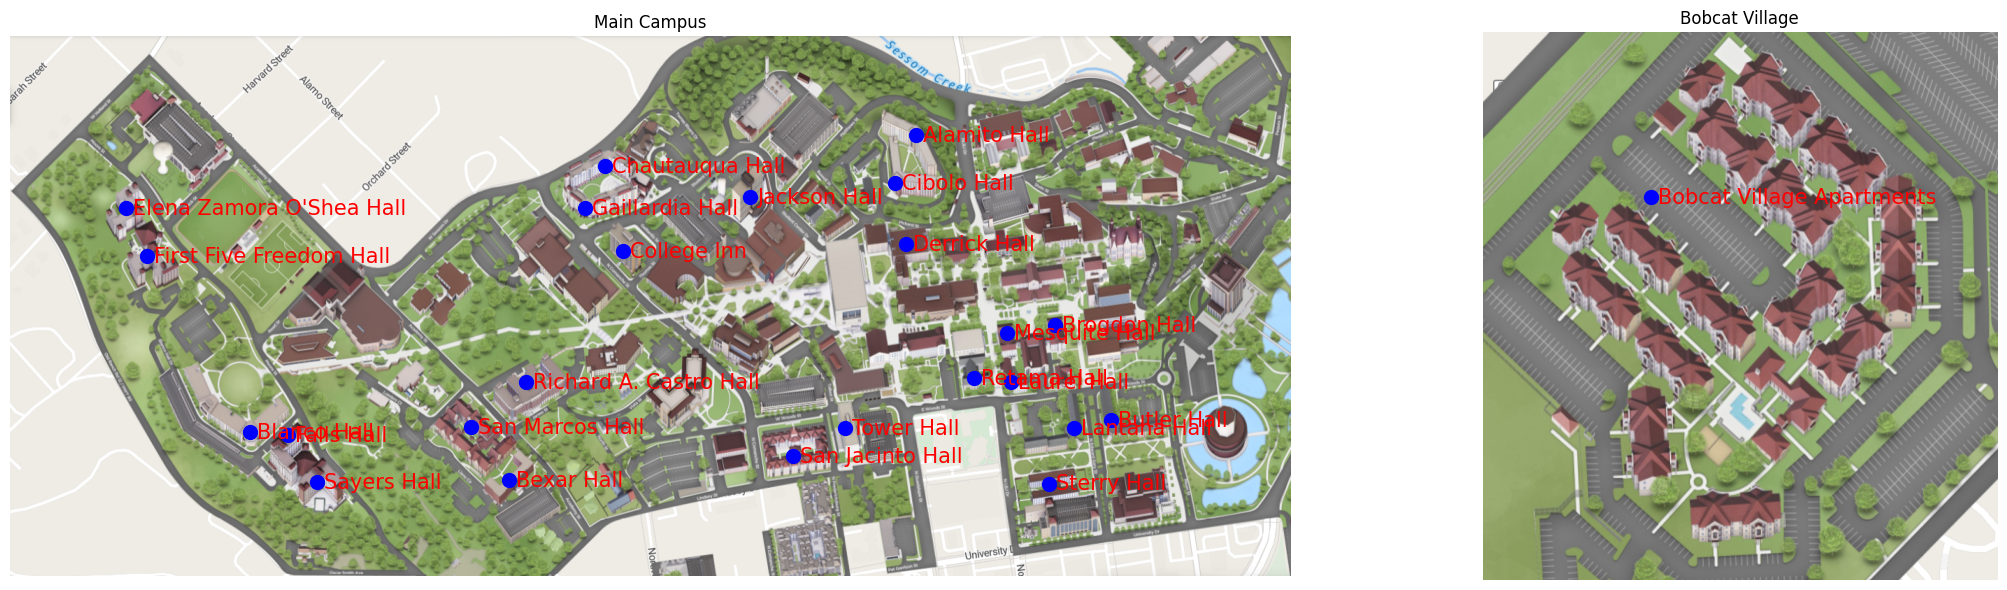

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

housing_dict = {}

for _, row in housing_list.iterrows():
    dorm_name = row["Housing"]

    if row["ImageType"] == "main":
        img = main_camp_img
    else:
        img = bobcat_village_img

    housing_dict[dorm_name] = {
        "x": row["X"],
        "y": row["Y"],
        "image": img,
        "size": 1 
    }

fig, axes = plt.subplots(1, 2, figsize=(24, 6))

axes[0].imshow(main_camp_img)
axes[0].set_title("Main Campus")
axes[0].axis("off")

axes[1].imshow(bobcat_village_img)
axes[1].set_title("Bobcat Village")
axes[1].axis("off")

for dorm, info in housing_dict.items():

    x = info["x"]
    y = info["y"]
    ax = axes[0] if info["image"] is main_camp_img else axes[1]

    ax.scatter(x, y, s=100, color="blue")
    ax.text(x + 10, y + 10, dorm, color="red", fontsize=15)

plt.tight_layout()
plt.show()


Calculate the size of each dot for the dorm locations creating a heatmap

In [30]:
on_campus_housting = df[df["Housing Type"] != "Off Campus"]
not_on_campus = df[df["Housing Type"] == "Off Campus"]
num_on_campus_visits = on_campus_housting.shape[0]
num_not_on_campus_visits = not_on_campus.shape[0]
print ("number of on campus visits:", num_on_campus_visits)
print ("number of off campus visits:", num_not_on_campus_visits)
housing_total_counts = on_campus_housting["Housing Type"].value_counts()
# print(housing_counts)
housing_counts = housing_total_counts / num_on_campus_visits
# print (housing_counts)

number of on campus visits: 1328
number of off campus visits: 2129


This chart is using the total number of checkins so it may be skewed based on a small amount of students going a lot of times

C:\Users\CJ Faircloth\AppData\Local\Temp\ipykernel_15672\2251024301.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Reds_r")


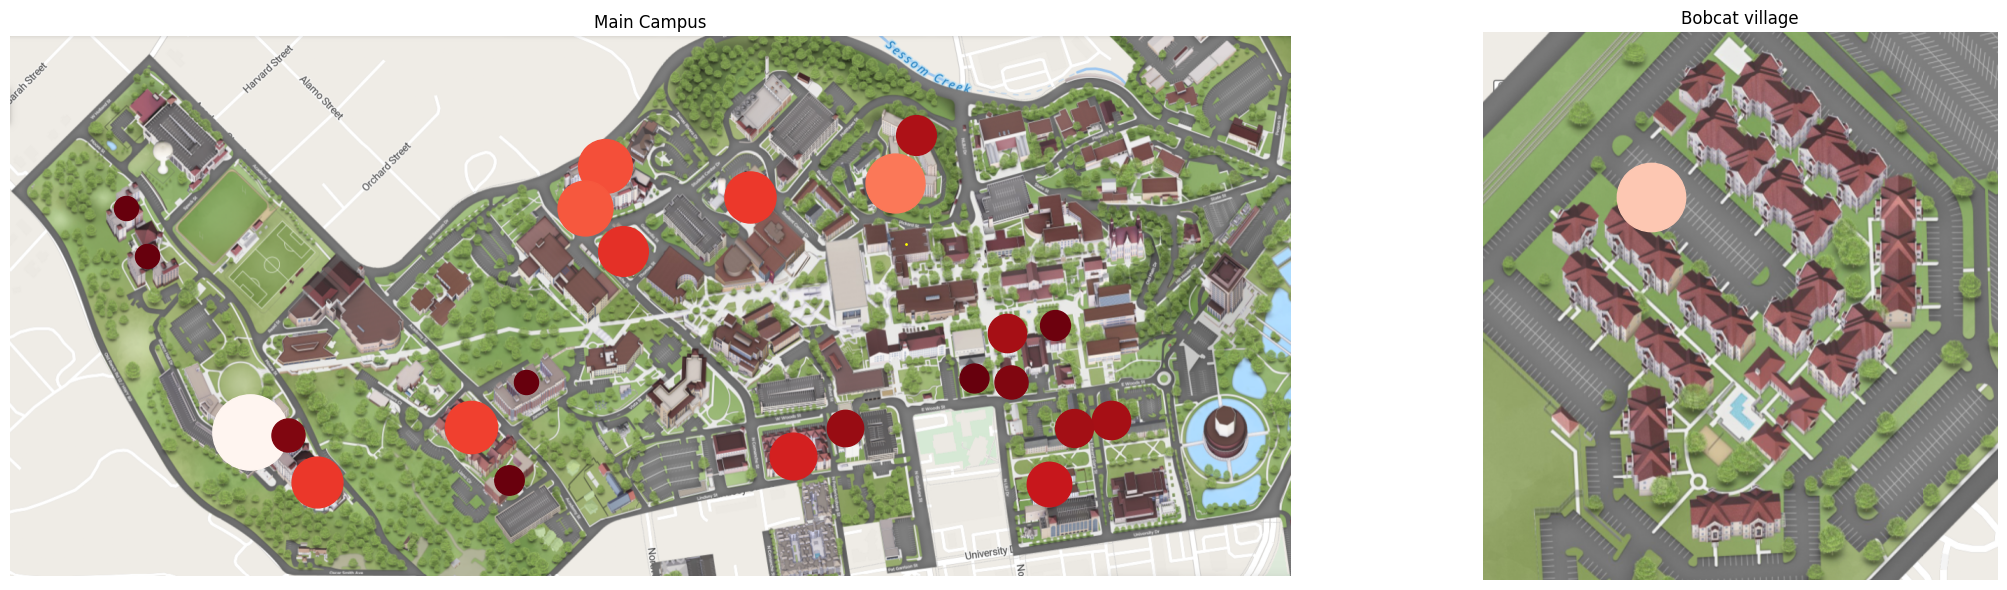

In [31]:
import matplotlib.cm as cm
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

axes[0].imshow(main_camp_img)
axes[0].set_title("Main Campus")
axes[0].axis("off")

axes[1].imshow(bobcat_village_img)
axes[1].set_title("Bobcat village")
axes[1].axis("off")

def size_fix(f):
    MIN = 300
    MAX = 20000
    return MIN + f * (MAX - MIN)

cmap = cm.get_cmap("Reds_r")
min_val = housing_counts.min()
max_val = housing_counts.max()

for dorm, info in housing_dict.items():
    if(dorm == "Derrick Hall"):
        axes[0].scatter(info["x"], info["y"], s=info["size"], color="yellow")
        continue
    # determine which map to plot on
    if info["image"] is main_camp_img:
        ax = axes[0]
    else:
        ax = axes[1]
    norm = housing_counts.get(dorm, 0)
    stretched = np.interp(norm, (min_val, max_val), (0, 1))

    size = size_fix(housing_counts.get(dorm, 0))
    color = cmap(stretched)
    
    ax.scatter(info["x"], info["y"], s=size, color=color)

plt.tight_layout()
plt.show()